#**Introduction to Qiskit**

*prepared by Nur Ainin Sabrina*

<br><br><br> <hr>





Qiskit is recognized as **open-source quantum computing framework**  developed by IBM that lets users design circuits, run simulations, and execute tasks on real quantum hardware. It offers one of the most complete open-source toolsets for advancing quantum research across multiple levels. Its efficient transpiler enables large-scale experimentation, preparing workloads up to 63 times faster than other software development kits (SDKs). It enhances accessibility to quantum computing for students, researchers, and developers.

The term “Qiskit” broadly refers to **a suite of software designed for running quantum programs**. Its main components are the *Qiskit SDK* and the **Qiskit Runtime environment**, which let users execute workloads on IBM® quantum processors (QPUs). As quantum technology advances, Qiskit continues to grow with new features and capabilities each year. Beyond the SDK itself, there is a wider Qiskit ecosystem of open-source projects that integrate with Qiskit. While not officially part of Qiskit, these tools enhance its functionality and support more diverse applications in quantum research and development.

<br>

<h4>Note</h4>

For this workshop, we will be using **Google Colab** exclusively. Since Colab resets its environment each time you open or run the notebook, you will need to install the required packages every time by running:

```
!pip install qiskit
!pip install qiskit[visualization]
!pip install qiskit_aer
```

If you are interested in setting up your own Qiskit environment on your computer, you can follow IBM’s video tutorial series here:

https://youtu.be/dZWz4Gs_BuI?si=wW7OHRliqVJwElz1

In [1]:
!pip install qiskit
!pip install qiskit[visualization]
!pip install qiskit_aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 79.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 78.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=eaa891897f33dbe7f51cc4d6e6e9c36aad36c76ae7ef28f69bd2baabadb4a3b9
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 90.2 MB/s eta 0:00:00



<h4> Qiskit Version </h4>

Make sure you are using the latest version of Qiskit (v2.2.1), as the IBM Quantum documentation has been updated to reflect this release.

You can find the official Qiskit documentation here:

https://quantum.cloud.ibm.com/docs/en/guides

In [2]:
import qiskit
versions = qiskit.__version__
print("The version of Qiskit is",versions)

The version of Qiskit is 2.2.2



---
<h3><b> Quantum Registers and Classical Register </b> </h3>


Quantum Register: *A collection of qubits (quantum bits) that can exist in superposition and entanglement. In Qiskit, a quantum register is used to store and manage these qubits for building quantum circuits.*


In [3]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

# 5 is the number of qubits we want to create
# qreg is the name of the quantum register
qreg =  QuantumRegister(5)


Classical Register: *A collection of classical bits (0 or 1) used to store the outcomes of qubit measurements. In Qiskit, we create a classical register to hold these results after observing the quantum state.*

In [4]:
# 4 is the number of classical bits we want to create
# creg is the name of the classical register
creg = ClassicalRegister(5)


---
<h3><b> Quantum Circuit </b> </h3>

In Qiskit, a quantum circuit combines quantum and classical registers to define quantum operations.


In [5]:
# a quantum circuit with quantum register qreg and classical register creg
circuit = QuantumCircuit(qreg,creg)

# You can create a quantum circuit with multiple quantum registers
output = QuantumRegister(1)
circuit2 = QuantumCircuit(qreg, output, creg)

# You can create a quantum circuit consisting of only a quantum register if no measurement will take place
circuit3 = QuantumCircuit(qreg)

# Creating a quantum circuit without specfiying any registers is also possible
# Creates a quantum circuit with 3 qubits and 3 classical bits
circuit4 = QuantumCircuit(3,3)

Gates are the building blocks of quantum circuits. They are applied to specific qubits to manipulate their states.

1. One qubit gates (act on a single qubit)

In [6]:
# apply x-gate (NOT operator) to the qubit "qreg[2]" of the quantum circuit "circuit"
circuit.x(qreg[2])

# apply z-gate (Z operator) to the qubit "qreg[4]" of the quantum circuit "circuit"
circuit.z(qreg[4])

# apply h-gate (Hadamard operator) to the qubit "qreg[1]" of the quantum circuit "circuit"
circuit.h(qreg[1])


2. Two-qubit gates (act on two qubits)


In [7]:
# controller qubit is qreg[1] -- the first parameter
# target qubit is qreg[0] -- the second parameter
# apply cx-gate (CNOT operator) to the qubits "qreg[1]" and "qreg[0]" of the quantum circuit "circuit"
circuit.cx(qreg[1],qreg[0])

# apply CZ gate to the qubits "qreg[2]" and "qreg[1]" of the quantum circuit "circuit"
circuit.cz(qreg[2],qreg[1])

# apply SWAP gate to the qubits "qreg[1]" and "qreg[3]" of the quantum circuit "circuit"
circuit.swap(qreg[1],qreg[3])

3. Three-qubit gates (act on three qubits)

In [8]:
# 1st controller qubit is qreg[2] -- the first parameter
# 2nd controller qubit is qreg[1] -- the second parameter
# target qubit is qreg[0] -- the third parameter
# apply ccx-gate (Toffoli (CCNOT) operator) to the qubits "qreg[2]", "qreg[1]", and "qreg[0]" of the quantum circuit "circuit"
circuit.ccx(qreg[2],qreg[1],qreg[0])



---
<h3> <b> Measuring a quantum circuit </b></h3>

Each quantum bit can be associated with a specific classical bit when measuring.



In [9]:
circuit.measure(qreg[0], creg[3])  # qubit 0 → classical bit 3
circuit.measure(qreg[1], creg[1])  # qubit 1 → classical bit 1
circuit.measure(qreg[2], creg[4])  # qubit 2 → classical bit 4
circuit.measure(qreg[3], creg[0])  # qubit 3 → classical bit 0
circuit.measure(qreg[4], creg[2])  # qubit 4 → classical bit 2

In many cases, each quantum bit is associated with the classical bit having the same index.

In [10]:
circuit.measure(qreg[0], creg[0])
circuit.measure(qreg[1], creg[1])
circuit.measure(qreg[2], creg[2])
circuit.measure(qreg[3], creg[3])
circuit.measure(qreg[4], creg[4])

This can be shortly specified as

In [11]:
# measure "qreg" and store the outcomes on "creg"
circuit.measure(qreg,creg)

<hr><h3><b> Visualization </b></h3>

Drawing or printing a quantum circuit

1. We use a method of circuit object called "draw". Without any parameters, the circuit is drawn by using ASCII art

In [12]:
circuit.draw()

┌───┐      ┌───┐┌─┐      ┌─┐            ┌─┐            
q0_0: ─────┤ X ├──────┤ X ├┤M├──────┤M├────────────┤M├────────────
      ┌───┐└─┬─┘      └─┬─┘└╥┘┌─┐   └╥┘┌─┐         └╥┘┌─┐         
q0_1: ┤ H ├──■───■──X───■───╫─┤M├────╫─┤M├──────────╫─┤M├─────────
      ├───┤      │  │   │   ║ └╥┘┌─┐ ║ └╥┘┌─┐       ║ └╥┘┌─┐      
q0_2: ┤ X ├──────■──┼───■───╫──╫─┤M├─╫──╫─┤M├───────╫──╫─┤M├──────
      └───┘         │  ┌─┐  ║  ║ └╥┘ ║  ║ └╥┘┌─┐    ║  ║ └╥┘┌─┐   
q0_3: ──────────────X──┤M├──╫──╫──╫──╫──╫──╫─┤M├────╫──╫──╫─┤M├───
      ┌───┐ ┌─┐        └╥┘  ║  ║  ║  ║  ║  ║ └╥┘┌─┐ ║  ║  ║ └╥┘┌─┐
q0_4: ┤ Z ├─┤M├─────────╫───╫──╫──╫──╫──╫──╫──╫─┤M├─╫──╫──╫──╫─┤M├
      └───┘ └╥┘         ║   ║  ║  ║  ║  ║  ║  ║ └╥┘ ║  ║  ║  ║ └╥┘
c0: 5/═══════╩══════════╩═══╩══╩══╩══╩══╩══╩══╩══╩══╩══╩══╩══╩══╩═
             2          0   3  1  4  0  1  2  3  4  0  1  2  3  4

2. The circuit can be drawn by using "matplotlib" library of python

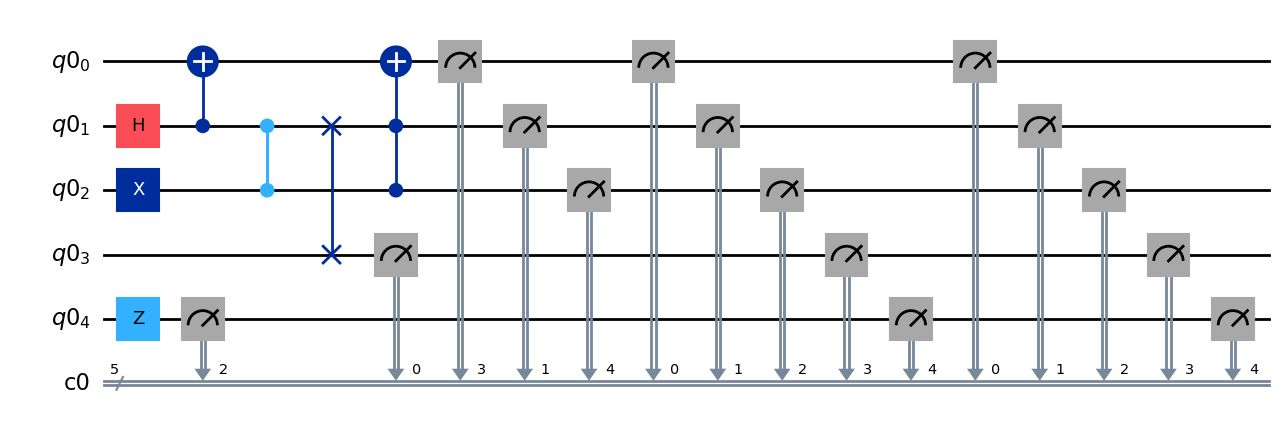

In [13]:
circuit.draw(output='mpl')

The quantum state of a circuit can be read when using "StatevectorSimulator". It is possible to get the exact quantum state from the simulator.

In [14]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import StatevectorSimulator

# Create quantum and classical registers with 2 qubits
qreg = QuantumRegister(2)
creg = ClassicalRegister(2)

# Create a new circuit
circuit = QuantumCircuit(qreg,creg)

# Apply H gate to qubit 0
circuit.h(qreg[0])

# This is the statevector simulator
job = StatevectorSimulator().run(circuit)
state = job.result().get_statevector(decimals=3)
print(state)

Statevector([0.707+0.j, 0.707+0.j, 0.   +0.j, 0.   +0.j],
            dims=(2, 2))


If you use simulator after the measurement, you will observe that the quantum state has collapsed to one of the states.

In [15]:
circuit.measure(qreg,creg)
job = StatevectorSimulator().run(circuit)
state = job.result().get_statevector(decimals=3)
print(state)

Statevector([0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))


The output of the circuit are the states $|00\rangle$ and $|01\rangle$ and they are measured almost equal number of times. At this point, we need to make a note about the order of the qubits in Qiskit. Qiskit combines the two quantum bits in the following order:

$$ qreg[1], qreg[0]$$

For example, when $X$ gate is applied to qreg[0], the state $|00\rangle$ becomes $|01\rangle$. If you want to obtain state $|10\rangle$, then you should apply $X$ gate to qreg[1].


In [16]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import AerSimulator

# Create quantum and classical registers with 2 qubits
qreg = QuantumRegister(2)
creg = ClassicalRegister(1) # It is enough to create a clasical register with 1 bit

# Create a new circuit
circuit = QuantumCircuit(qreg,creg)

# Apply H gate to qubit 0
circuit.h(qreg[0])

# Measure qreg[0]
circuit.measure(qreg[0],creg[0])

job = AerSimulator().run(circuit,shots=1000)
counts = job.result().get_counts()
print(counts)

{'0': 492, '1': 508}


<hr><b><h3> Example 1 </b></h3>

    
Create a quantum circuit with 10 qubits.

1. Apply ${H}$ gate to qubit 0
2. Apply nine ${CNOT}$ gates where qubit $0$ is the control and qubit $i$ is the target for $i=1\cdots9$.

Draw your circuit.

In [17]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

# Create quantum and classical registers with 10 qubits
qreg = QuantumRegister(10)
creg = ClassicalRegister(10) #For this question we don't need to create this

# Create a new circuit
circuit = QuantumCircuit(qreg,creg)

# Apply H to qubit 0
circuit.h(qreg[0])

# Apply CX gates
for i in range(1,10):
    circuit.cx(qreg[0],qreg[i])

circuit.draw()

┌───┐                                             
 q4_0: ┤ H ├──■────■────■────■────■────■────■────■────■──
       └───┘┌─┴─┐  │    │    │    │    │    │    │    │  
 q4_1: ─────┤ X ├──┼────┼────┼────┼────┼────┼────┼────┼──
            └───┘┌─┴─┐  │    │    │    │    │    │    │  
 q4_2: ──────────┤ X ├──┼────┼────┼────┼────┼────┼────┼──
                 └───┘┌─┴─┐  │    │    │    │    │    │  
 q4_3: ───────────────┤ X ├──┼────┼────┼────┼────┼────┼──
                      └───┘┌─┴─┐  │    │    │    │    │  
 q4_4: ────────────────────┤ X ├──┼────┼────┼────┼────┼──
                           └───┘┌─┴─┐  │    │    │    │  
 q4_5: ─────────────────────────┤ X ├──┼────┼────┼────┼──
                                └───┘┌─┴─┐  │    │    │  
 q4_6: ──────────────────────────────┤ X ├──┼────┼────┼──
                                     └───┘┌─┴─┐  │    │  
 q4_7: ───────────────────────────────────┤ X ├──┼────┼──
                                          └───┘┌─┴─┐  │  
 q4_8: ────────────────────────────────────────┤ X ├──┼──
                                               └───┘┌─┴─┐
 q4_9: ─────────────────────────────────────────────┤ X ├
                                                    └───┘
c3: 10/══════════════════════════════════════════════════

<hr><h3><b> Example 2 </b></h3>

Implement the circuit in Task 1. Measure all the qubits and simulate your circuit for 1000 times.



In [18]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import AerSimulator


# Create quantum and classical registers with 10 qubits
qreg = QuantumRegister(10)
creg = ClassicalRegister(10)

# Create a new circuit
circuit = QuantumCircuit(qreg,creg)

# Apply H to qubit 0
circuit.h(qreg[0])

# Apply CX gates
for i in range(1,10):
    circuit.cx(qreg[0],qreg[i])

circuit.measure(qreg,creg)

# This is the local simulator
# Shots is the how many times we want to run the circuit
job = AerSimulator().run(circuit,shots=1000)

# Get the results as a dictionary
counts = job.result().get_counts(circuit)
print(counts)

{'0000000000': 507, '1111111111': 493}


<hr><b><h3> Question 1 </b></h3>

    
Create a quantum circuit with 10 qubits.

1. Apply ${H}$ gates to all qubits.
2. Apply ${X}$ gate to qubit 0 controlled by qubits 1-9
2. Apply ${H}$ gates to all qubits.

Draw your circuit.

In [ ]:
# Your solution here